# Data Extraction

In [1]:
import pandas as pd
import numpy as np
filelist = [
    "LTSvsSTS-Data/NU00295.csv", "LTSvsSTS-Data/NU00429.csv", "LTSvsSTS-Data/NU00431.csv", "LTSvsSTS-Data/NU00468.csv", 
    "LTSvsSTS-Data/NU00759.csv", "LTSvsSTS-Data/NU00826.csv", "LTSvsSTS-Data/NU00866.csv", "LTSvsSTS-Data/NU00908.csv", 
    "LTSvsSTS-Data/NU01094.csv", "LTSvsSTS-Data/NU01115.csv", "LTSvsSTS-Data/NU01405.csv", "LTSvsSTS-Data/NU01420.csv", 
    "LTSvsSTS-Data/NU01482.csv", "LTSvsSTS-Data/NU01713.csv", "LTSvsSTS-Data/NU01798.csv", "LTSvsSTS-Data/NU01929.csv", 
    "LTSvsSTS-Data/NU02064.csv", "LTSvsSTS-Data/NU02359.csv", "LTSvsSTS-Data/NU02514.csv", "LTSvsSTS-Data/NU02738.csv"]
thresholddict = {
    "LTSvsSTS-Data/NU00295.csv": {
        "CD11c_R": 1.59, "CD163_R": 1.30, "CD205_R": 1.40, "CD206_R": 1.40, "CD8_R": 1.85,
        "CD4_R": 1.32, "CD103_R": 1.50, "FOXP3_R": 1.46, "GFAP_R": 3.21, "GRZMB_R": 1.89,
        "HLADR_R": 1.74, "INFgamma_R": 1.92, "Ki67_R": 1.66, "NFAT1_R": 1.89, "NFAT2_R": 2.50,
        "P2RY12_R": 1.31, "PD1_R": 1.38, "PDL1_R": 1.48, "Perforin_R": 1.63, "SOX2_R": 2.20,
        "TIM3_R": 1.31, "TNFa_R": 1.84, "cCasp3_R": 1.27, "pLCK_R": 2.20, "pSTAT3_R": 1.26,
        "CD68_R": 1.43},
    "LTSvsSTS-Data/NU00429.csv": {
        "CD11c_R": 1.75, "CD163_R": 1.48, "CD205_R": 1.58, "CD206_R": 1.76, "CD8_R": 2.11,
        "CD4_R": 1.34, "CD103_R": 1.61, "FOXP3_R": 1.77, "GFAP_R": 2.46, "GRZMB_R": 2.20,
        "HLADR_R": 1.68, "INFgamma_R": 2.02, "Ki67_R": 1.92, "NFAT1_R": 2.36, "NFAT2_R": 2.50,
        "P2RY12_R": 1.38, "PD1_R": 1.99, "PDL1_R": 1.55, "Perforin_R": 2.23, "SOX2_R": 1.30,
        "TIM3_R": 1.52, "TNFa_R": 2.50, "cCasp3_R": 1.29, "pLCK_R": 2.25, "pSTAT3_R": 1.32,
        "CD68_R": 1.42},
    "LTSvsSTS-Data/NU00431.csv": {
        "CD11c_R": 1.60, "CD163_R": 1.46, "CD205_R": 1.57, "CD206_R": 1.44, "CD8_R": 2.17,
        "CD4_R": 1.41, "CD103_R": 1.52, "FOXP3_R": 1.50, "GFAP_R": 1.96, "GRZMB_R": 2.35,
        "HLADR_R": 1.82, "INFgamma_R": 2.15, "Ki67_R": 1.96, "NFAT1_R": 2.09, "NFAT2_R": 1.84,
        "P2RY12_R": 1.40, "PD1_R": 1.50, "PDL1_R": 1.52, "Perforin_R": 1.96, "SOX2_R": 1.43,
        "TIM3_R": 1.40, "TNFa_R": 2.12, "cCasp3_R": 1.44, "pLCK_R": 2.08, "pSTAT3_R": 1.28,
        "CD68_R": 1.74},
    "LTSvsSTS-Data/NU00468.csv": {
        "CD11c_R": 1.70, "CD163_R": 1.43, "CD205_R": 1.48, "CD206_R": 1.68, "CD8_R": 2.55,
        "CD4_R": 1.36, "CD103_R": 1.54, "FOXP3_R": 1.61, "GFAP_R": 2.41, "GRZMB_R": 2.27,
        "HLADR_R": 2.10, "INFgamma_R": 1.66, "Ki67_R": 2.00, "NFAT1_R": 1.89, "NFAT2_R": 2.00,
        "P2RY12_R": 1.33, "PD1_R": 1.48, "PDL1_R": 1.56, "Perforin_R": 2.00, "SOX2_R": 2.16,
        "TIM3_R": 1.48, "TNFa_R": 3.30, "cCasp3_R": 1.26, "pLCK_R": 2.50, "pSTAT3_R": 1.24,
        "CD68_R": 1.70},
    "LTSvsSTS-Data/NU00759.csv": {
        "CD11c_R": 1.62, "CD163_R": 1.39, "CD205_R": 1.74, "CD206_R": 1.69, "CD8_R": 3.91,
        "CD4_R": 1.42, "CD103_R": 1.64, "FOXP3_R": 2.2, "GFAP_R": 6.5, "GRZMB_R": 6.42,
        "HLADR_R": 2.63, "INFgamma_R": 4.94, "Ki67_R": 2.80, "NFAT1_R": 2.20, "NFAT2_R": 4.49,
        "P2RY12_R": 1.43, "PD1_R": 2.12, "PDL1_R": 1.57, "Perforin_R": 3.0, "SOX2_R": 1.48,
        "TIM3_R": 1.40, "TNFa_R": 3.78, "cCasp3_R": 1.38, "pLCK_R": 2.55, "pSTAT3_R": 1.42,
        "CD68_R": 1.89},
    "LTSvsSTS-Data/NU00826.csv": {
        "CD11c_R": 1.54, "CD163_R": 1.45, "CD205_R": 1.45, "CD206_R": 1.60, "CD8_R": 2.73,
        "CD4_R": 1.35, "CD103_R": 1.52, "FOXP3_R": 1.58, "GFAP_R": 4.18, "GRZMB_R": 2.32,
        "HLADR_R": 2.19, "INFgamma_R": 2.15, "Ki67_R": 1.66, "NFAT1_R": 3.11, "NFAT2_R": 10.41,
        "P2RY12_R": 1.30, "PD1_R": 1.59, "PDL1_R": 1.74, "Perforin_R": 2.32, "SOX2_R": 1.28,
        "TIM3_R": 1.47, "TNFa_R": 3.02, "cCasp3_R": 1.40, "pLCK_R": 2.31, "pSTAT3_R": 1.33,
        "CD68_R": 2.02},
    "LTSvsSTS-Data/NU00866.csv": {
        "CD11c_R": 1.61, "CD163_R": 1.42, "CD205_R": 1.40, "CD206_R": 1.44, "CD8_R": 2.15,
        "CD4_R": 1.42, "CD103_R": 1.59, "FOXP3_R": 1.47, "GFAP_R": 1.86, "GRZMB_R": 2.23,
        "HLADR_R": 1.83, "INFgamma_R": 1.90, "Ki67_R": 1.79, "NFAT1_R": 1.94, "NFAT2_R": 2.40,
        "P2RY12_R": 1.34, "PD1_R": 1.36, "PDL1_R": 1.37, "Perforin_R": 1.80, "SOX2_R": 1.43,
        "TIM3_R": 1.37, "TNFa_R": 3.24, "cCasp3_R": 1.25, "pLCK_R": 2.25, "pSTAT3_R": 1.33,
        "CD68_R": 1.61},
    "LTSvsSTS-Data/NU00908.csv": {
        "CD11c_R": 1.50, "CD163_R": 1.25, "CD205_R": 1.42, "CD206_R": 1.49, "CD8_R": 1.96, 
        "CD4_R": 1.40, "CD103_R": 1.31, "FOXP3_R": 1.51, "GFAP_R": 2.87, "GRZMB_R": 3.44,
        "HLADR_R": 1.62, "INFgamma_R": 1.64, "Ki67_R": 1.80, "NFAT1_R": 2.04, "NFAT2_R": 1.78, 
        "P2RY12_R": 1.18, "PD1_R": 1.38, "PDL1_R": 1.40, "Perforin_R": 2.70, "SOX2_R": 1.35,
        "TIM3_R": 1.18, "TNFa_R": 2.20, "cCasp3_R": 1.17, "pLCK_R": 1.68, "pSTAT3_R": 1.25,
        "CD68_R": 1.53},
    "LTSvsSTS-Data/NU01094.csv": {
        "CD11c_R": 1.70, "CD163_R": 1.44, "CD205_R": 1.48, "CD206_R": 1.60, "CD8_R": 2.70,
        "CD4_R": 1.38, "CD103_R": 1.78, "FOXP3_R": 1.41, "GFAP_R": 5.00, "GRZMB_R": 3.32,
        "HLADR_R": 2.39, "INFgamma_R": 2.88, "Ki67_R": 1.88, "NFAT1_R": 2.06, "NFAT2_R": 1.84,
        "P2RY12_R": 1.48, "PD1_R": 1.42, "PDL1_R": 1.52, "Perforin_R": 2.60, "SOX2_R": 1.31,
        "TIM3_R": 1.42, "TNFa_R": 2.98, "cCasp3_R": 1.33, "pLCK_R": 2.10, "pSTAT3_R": 1.32,
        "CD68_R": 1.78},
    "LTSvsSTS-Data/NU01115.csv": {
        "CD11c_R": 1.58, "CD163_R": 1.56, "CD205_R": 1.69, "CD206_R": 1.80, "CD8_R": 2.35,
        "CD4_R": 1.56, "CD103_R": 1.52, "FOXP3_R": 3.78, "GFAP_R": 1.92, "GRZMB_R": 5.12,
        "HLADR_R": 1.87, "INFgamma_R": 12.05, "Ki67_R": 2.12, "NFAT1_R": 3.11, "NFAT2_R": 5.01,
        "P2RY12_R": 1.22, "PD1_R": 3.89, "PDL1_R": 1.72, "Perforin_R": 2.19, "SOX2_R": 1.32,
        "TIM3_R": 1.31, "TNFa_R": 2.59, "cCasp3_R": 1.32, "pLCK_R": 2.51, "pSTAT3_R": 1.43,
        "CD68_R": 1.96},
    "LTSvsSTS-Data/NU01405.csv": {
        "CD11c_R": 1.47, "CD163_R": 1.36, "CD205_R": 1.63, "CD206_R": 1.71, "CD8_R": 2.22,
        "CD4_R": 1.47, "CD103_R": 1.32, "FOXP3_R": 1.53, "GFAP_R": 3.05, "GRZMB_R": 1.75,
        "HLADR_R": 1.80, "INFgamma_R": 1.78, "Ki67_R": 1.90, "NFAT1_R": 1.74, "NFAT2_R": 1.80,
        "P2RY12_R": 1.37, "PD1_R": 1.64, "PDL1_R": 1.61, "Perforin_R": 1.73, "SOX2_R": 1.52,
        "TIM3_R": 1.37, "TNFa_R": 1.86, "cCasp3_R": 1.32, "pLCK_R": 1.62, "pSTAT3_R": 1.34,
        "CD68_R": 1.45},
    "LTSvsSTS-Data/NU01420.csv": {
        "CD11c_R": 1.57, "CD163_R": 1.39, "CD205_R": 1.41, "CD206_R": 1.60, "CD8_R": 2.38,
        "CD4_R": 1.52, "CD103_R": 1.71, "FOXP3_R": 1.51, "GFAP_R": 3.58, "GRZMB_R": 2.10,
        "HLADR_R": 1.90, "INFgamma_R": 2.41, "Ki67_R": 2.07, "NFAT1_R": 2.21, "NFAT2_R": 2.53,
        "P2RY12_R": 1.39, "PD1_R": 1.45, "PDL1_R": 1.45, "Perforin_R": 3.87, "SOX2_R": 1.52,
        "TIM3_R": 1.45, "TNFa_R": 2.74, "cCasp3_R": 1.30, "pLCK_R": 2.32, "pSTAT3_R": 1.35,
        "CD68_R": 1.69},
    "LTSvsSTS-Data/NU01482.csv": {
        "CD11c_R": 1.55, "CD163_R": 1.51, "CD205_R": 1.48, "CD206_R": 1.53, "CD8_R": 2.62,
        "CD4_R": 1.49, "CD103_R": 1.57, "FOXP3_R": 1.54, "GFAP_R": 3.12, "GRZMB_R": 2.37,
        "HLADR_R": 1.97, "INFgamma_R": 3.12, "Ki67_R": 2.04, "NFAT1_R": 7.95, "NFAT2_R": 10.3,
        "P2RY12_R": 1.30, "PD1_R": 1.61, "PDL1_R": 1.57, "Perforin_R": 2.37, "SOX2_R": 1.34,
        "TIM3_R": 1.43, "TNFa_R": 3.16, "cCasp3_R": 1.42, "pLCK_R": 2.75, "pSTAT3_R": 1.41,
        "CD68_R": 1.96},
    "LTSvsSTS-Data/NU01713.csv": {
        "CD11c_R": 2.39, "CD163_R": 1.85, "CD205_R": 1.52, "CD206_R": 2.19, "CD8_R": 2.26,
        "CD4_R": 1.47, "CD103_R": 2.06, "FOXP3_R": 1.57, "GFAP_R": 3.22, "GRZMB_R": 2.34,
        "HLADR_R": 2.40, "INFgamma_R": 2.10, "Ki67_R": 3.47, "NFAT1_R": 2.84, "NFAT2_R": 2.67,
        "P2RY12_R": 1.37, "PD1_R": 1.47, "PDL1_R": 1.70, "Perforin_R": 4.40, "SOX2_R": 1.75,
        "TIM3_R": 1.77, "TNFa_R": 2.91, "cCasp3_R": 1.41, "pLCK_R": 8.75, "pSTAT3_R": 2.68,
        "CD68_R": 2.05},
    "LTSvsSTS-Data/NU01798.csv": {
        "CD11c_R": 1.66, "CD163_R": 1.32, "CD205_R": 1.33, "CD206_R": 1.59, "CD8_R": 1.53,
        "CD4_R": 1.35, "CD103_R": 1.49, "FOXP3_R": 1.56, "GFAP_R": 2.03, "GRZMB_R": 4.16,
        "HLADR_R": 1.55, "INFgamma_R": 1.50, "Ki67_R": 1.47, "NFAT1_R": 1.70, "NFAT2_R": 4.43,
        "P2RY12_R": 1.36, "PD1_R": 1.50, "PDL1_R": 1.48, "Perforin_R": 2.41, "SOX2_R": 1.48,
        "TIM3_R": 1.38, "TNFa_R": 4.58, "cCasp3_R": 1.31, "pLCK_R": 1.62, "pSTAT3_R": 1.34,
        "CD68_R": 1.45},
    "LTSvsSTS-Data/NU01929.csv": {
        "CD11c_R": 1.58, "CD163_R": 1.38, "CD205_R": 1.46, "CD206_R": 1.76, "CD8_R": 1.94,
        "CD4_R": 1.33, "CD103_R": 1.57, "FOXP3_R": 1.52, "GFAP_R": 2.10, "GRZMB_R": 2.10,
        "HLADR_R": 1.61, "INFgamma_R": 1.61, "Ki67_R": 2.06, "NFAT1_R": 1.94, "NFAT2_R": 1.77,
        "P2RY12_R": 1.33, "PD1_R": 1.52, "PDL1_R": 1.51, "Perforin_R": 1.69, "SOX2_R": 1.28,
        "TIM3_R": 1.37, "TNFa_R": 2.36, "cCasp3_R": 1.36, "pLCK_R": 1.91, "pSTAT3_R": 1.39,
        "CD68_R": 1.64},
    "LTSvsSTS-Data/NU02064.csv": {
        "CD11c_R": 1.65, "CD163_R": 1.45, "CD205_R": 1.52, "CD206_R": 1.90, "CD8_R": 2.55,
        "CD4_R": 1.43, "CD103_R": 1.54, "FOXP3_R": 1.54, "GFAP_R": 2.66, "GRZMB_R": 2.52,
        "HLADR_R": 2.41, "INFgamma_R": 2.05, "Ki67_R": 2.04, "NFAT1_R": 1.96, "NFAT2_R": 2.62,
        "P2RY12_R": 1.36, "PD1_R": 1.49, "PDL1_R": 1.54, "Perforin_R": 1.85, "SOX2_R": 1.31,
        "TIM3_R": 1.52, "TNFa_R": 2.45, "cCasp3_R": 1.39, "pLCK_R": 2.53, "pSTAT3_R": 1.34,
        "CD68_R": 1.86},
    "LTSvsSTS-Data/NU02359.csv": {
        "CD11c_R": 1.61, "CD163_R": 1.47, "CD205_R": 1.64, "CD206_R": 1.83, "CD8_R": 2.47,
        "CD4_R": 1.38, "CD103_R": 1.52, "FOXP3_R": 1.46, "GFAP_R": 3.93, "GRZMB_R": 1.72,
        "HLADR_R": 2.44, "INFgamma_R": 2.29, "Ki67_R": 2.13, "NFAT1_R": 1.90, "NFAT2_R": 1.70,
        "P2RY12_R": 1.34, "PD1_R": 1.63, "PDL1_R": 1.61, "Perforin_R": 1.72, "SOX2_R": 1.31,
        "TIM3_R": 1.55, "TNFa_R": 2.94, "cCasp3_R": 1.47, "pLCK_R": 2.55, "pSTAT3_R": 1.38,
        "CD68_R": 1.95},
    "LTSvsSTS-Data/NU02514.csv": {
        "CD11c_R": 1.87, "CD163_R": 1.50,"CD205_R": 1.49, "CD206_R": 1.64, "CD8_R": 1.74, 
        "CD4_R": 1.405, "CD103_R": 1.64, "FOXP3_R": 1.506, "GFAP_R": 2.44, "GRZMB_R": 1.60,
        "HLADR_R": 1.76, "INFgamma_R": 2.62, "Ki67_R": 1.91, "NFAT1_R": 2.18, "NFAT2_R": 2.00,
        "P2RY12_R": 1.54, "PD1_R": 1.55, "PDL1_R": 1.54, "Perforin_R": 1.70, "SOX2_R": 2.00, 
        "TIM3_R": 1.63, "TNFa_R": 2.40, "cCasp3_R": 1.42, "pLCK_R": 1.85, "pSTAT3_R": 1.48, 
        "CD68_R": 1.74},
    "LTSvsSTS-Data/NU02738.csv": {
        "CD11c_R": 1.62, "CD163_R": 1.69, "CD205_R": 1.80, "CD206_R": 1.63, "CD8_R": 3.73,
        "CD4_R": 1.47, "CD103_R": 1.71, "FOXP3_R": 1.55, "GFAP_R": 2.45, "GRZMB_R": 3.20,
        "HLADR_R": 2.12, "INFgamma_R": 2.72, "Ki67_R": 2.50, "NFAT1_R": 2.64, "NFAT2_R": 3.06,
        "P2RY12_R": 1.42, "PD1_R": 1.57, "PDL1_R": 1.43, "Perforin_R": 2.41, "SOX2_R": 1.30,
        "TIM3_R": 1.37, "TNFa_R": 4.18, "cCasp3_R": 1.34, "pLCK_R": 2.65, "pSTAT3_R": 1.37,
        "CD68_R": 2.21},
}

phenotypedict = {
    # Single marker phenotypes
    "CD11c+": ["CD11c_R"], "CD163+": ["CD163_R"], "CD205+": ["CD205_R"], "CD206+": ["CD206_R"], "CD8+": ["CD8_R"],
    "CD4+": ["CD4_R"], "CD103+": ["CD103_R"], "FOXP3+": ["FOXP3_R"], "GFAP+": ["GFAP_R"], "GRZMB+": ["GRZMB_R"],
    "HLADR+": ["HLADR_R"], "INFgamma+": ["INFgamma_R"], "Ki67+": ["Ki67_R"], "NFAT1+": ["NFAT1_R"], "NFAT2+": ["NFAT2_R"],
    "P2RY12+": ["P2RY12_R"], "PD1+": ["PD1_R"], "PDL1+": ["PDL1_R"], "Perforin+": ["Perforin_R"], "SOX2+": ["SOX2_R"],
    "TIM3+": ["TIM3_R"], "TNFa+": ["TNFa_R"], "cCasp3+": ["cCasp3_R"], "pLCK+": ["pLCK_R"], "pSTAT3+": ["pSTAT3_R"],
    "CD68+": ["CD68_R"],

    # GFAP phenotypes
    "GFAP+Ki67+": ["GFAP_R", "Ki67_R"], "GFAP+SOX2+": ["GFAP_R", "SOX2_R"], "GFAP+cCasp3+": ["GFAP_R", "cCasp3_R"],
    "GFAP+pSTAT3+": ["GFAP_R", "pSTAT3_R"], "GFAP+PD1+": ["GFAP_R", "PD1_R"], "GFAP+TIM3+": ["GFAP_R", "TIM3_R"],

    # Helper T-cell phenotypes 
    "CD4+Ki67+": ["CD4_R", "Ki67_R"], "CD4+pSTAT3+": ["CD4_R", "pSTAT3_R"], "CD4+cCasp3+": ["CD4_R", "cCasp3_R"], 
    "CD4+FOXP3+": ["CD4_R", "FOXP3_R"], "CD4+NFAT1+": ["CD4_R", "NFAT1_R"], "CD4+NFAT2+": ["CD4_R", "NFAT2_R"], 
    "CD4+pLCK+": ["CD4_R", "pLCK_R"], "CD4+NFAT1+pLCK+": ["CD4_R", "NFAT1_R", "pLCK_R"], "CD4+NFAT2+pLCK+": ["CD4_R", "NFAT2_R", "pLCK_R"], 
    "CD4+PD1+": ["CD4_R", "PD1_R"], "CD4+CD103+": ["CD4_R", "CD103_R"],

    # Killer T-cell phenotypes
    "CD8+Ki67+": ["CD8_R", "Ki67_R"], "CD8+pSTAT3+": ["CD8_R", "pSTAT3_R"], "CD8+cCasp3+": ["CD8_R", "cCasp3_R"], 
    "CD8+FOXP3+": ["CD8_R", "FOXP3_R"], "CD8+NFAT1+": ["CD8_R", "NFAT1_R"], "CD8+NFAT2+": ["CD8_R", "NFAT2_R"], 
    "CD8+pLCK+": ["CD8_R", "pLCK_R"], "CD8+NFAT1+pLCK+": ["CD8_R", "NFAT1_R", "pLCK_R"], "CD8+NFAT2+pLCK+": ["CD8_R", "NFAT2_R", "pLCK_R"],
    "CD8+PD1+": ["CD8_R", "PD1_R"], "CD8+CD103+": ["CD8_R", "CD103_R"], "CD8+Perforin+": ["CD8_R", "Perforin_R"], 
    "CD8+GRZMB+": ["CD8_R", "GRZMB_R"],

    # Macrophage/Microglia phenotypes
    "CD68+CD163+": ["CD68_R", "CD163_R"], "CD68+CD163+CD206+": ["CD68_R", "CD163_R", "CD206_R"], "CD163+CD206+": ["CD163_R", "CD206_R"], 
    "CD68+CD11c+": ["CD68_R", "CD11c_R"], "CD11c+CD205+": ["CD11c_R", "CD205_R"], "CD11c+CD103+": ["CD11c_R", "CD103_R"], 
    "CD11c+P2RY12+": ["CD11c_R", "P2RY12_R"], "CD68+CD163+CD11c+": ["CD68_R", "CD163_R", "CD11c_R"],

    # Macrophage/Microglia p-STAT3 phenotypes
    'CD68+CD163+pSTAT3+': ['CD68_R', 'CD163_R', 'pSTAT3_R'],
    'CD68+CD163+CD206+pSTAT3+': ['CD68_R', 'CD163_R', 'CD206_R', 'pSTAT3_R'],
    'CD163+CD206+pSTAT3+': ['CD163_R', 'CD206_R', 'pSTAT3_R'],
    'CD68+CD11c+pSTAT3+': ['CD68_R', 'CD11c_R', 'pSTAT3_R'],
    'CD11c+CD205+pSTAT3+': ['CD11c_R', 'CD205_R', 'pSTAT3_R'],
    'CD11c+CD103+pSTAT3+': ['CD11c_R', 'CD103_R', 'pSTAT3_R'],
    'P2RY12+pSTAT3+': ['P2RY12_R', 'pSTAT3_R'],
    'CD11c+P2RY12+pSTAT3+': ['CD11c_R', 'P2RY12_R', 'pSTAT3_R'],
    'CD68+pSTAT3+': ['CD68_R', 'pSTAT3_R'],
    'CD163+pSTAT3+': ['CD163_R', 'pSTAT3_R'],
    'CD206+pSTAT3+': ['CD206_R', 'pSTAT3_R'],
    'CD11c+pSTAT3+': ['CD11c_R', 'pSTAT3_R'],
    'CD68+CD163+CD11c+pSTAT3+': ['CD68_R', 'CD163_R', 'CD11c_R', 'pSTAT3_R'],

    # Macrophage/Microglia Ki67 phenotypes
    'CD68+CD163+Ki67+': ['CD68_R', 'CD163_R', 'Ki67_R'],
    'CD68+CD163+CD206+Ki67+': ['CD68_R', 'CD163_R', 'CD206_R', 'Ki67_R'],
    'CD163+CD206+Ki67+': ['CD163_R', 'CD206_R', 'Ki67_R'],
    'CD68+CD11c+Ki67+': ['CD68_R', 'CD11c_R', 'Ki67_R'],
    'CD11c+CD205+Ki67+': ['CD11c_R', 'CD205_R', 'Ki67_R'],
    'CD11c+CD103+Ki67+': ['CD11c_R', 'CD103_R', 'Ki67_R'],
    'P2RY12+Ki67+': ['P2RY12_R', 'Ki67_R'],
    'CD11c+P2RY12+Ki67+': ['CD11c_R', 'P2RY12_R', 'Ki67_R'],
    'CD68+Ki67+': ['CD68_R', 'Ki67_R'],
    'CD163+Ki67+': ['CD163_R', 'Ki67_R'],
    'CD206+Ki67+': ['CD206_R', 'Ki67_R'],
    'CD11c+Ki67+': ['CD11c_R', 'Ki67_R'],
    'CD68+CD163+CD11c+Ki67+': ['CD68_R', 'CD163_R', 'CD11c_R', 'Ki67_R'],

    # Macrophage/Microglia cCasp3 phenotypes
    'CD68+CD163+cCasp3+': ['CD68_R', 'CD163_R', 'cCasp3_R'],
    'CD68+CD163+CD206+cCasp3+': ['CD68_R', 'CD163_R', 'CD206_R', 'cCasp3_R'],
    'CD163+CD206+cCasp3+': ['CD163_R', 'CD206_R', 'cCasp3_R'],
    'CD68+CD11c+cCasp3+': ['CD68_R', 'CD11c_R', 'cCasp3_R'],
    'CD11c+CD205+cCasp3+': ['CD11c_R', 'CD205_R', 'cCasp3_R'],
    'CD11c+CD103+cCasp3+': ['CD11c_R', 'CD103_R', 'cCasp3_R'],
    'P2RY12+cCasp3+': ['P2RY12_R', 'cCasp3_R'],
    'CD11c+P2RY12+cCasp3+': ['CD11c_R', 'P2RY12_R', 'cCasp3_R'],
    'CD68+cCasp3+': ['CD68_R', 'cCasp3_R'],
    'CD163+cCasp3+': ['CD163_R', 'cCasp3_R'],
    'CD206+cCasp3+': ['CD206_R', 'cCasp3_R'],
    'CD11c+cCasp3+': ['CD11c_R', 'cCasp3_R'],
    'CD68+CD163+CD11c+cCasp3+': ['CD68_R', 'CD163_R', 'CD11c_R', 'cCasp3_R'],

    # Macrophage/Microglia HLADR phenotypes
    'CD68+CD163+HLADR+': ['CD68_R', 'CD163_R', 'HLADR_R'],
    'CD68+CD163+CD206+HLADR+': ['CD68_R', 'CD163_R', 'CD206_R', 'HLADR_R'],
    'CD163+CD206+HLADR+': ['CD163_R', 'CD206_R', 'HLADR_R'],
    'CD68+CD11c+HLADR+': ['CD68_R', 'CD11c_R', 'HLADR_R'],
    'CD11c+CD205+HLADR+': ['CD11c_R', 'CD205_R', 'HLADR_R'],
    'CD11c+CD103+HLADR+': ['CD11c_R', 'CD103_R', 'HLADR_R'],
    'P2RY12+HLADR+': ['P2RY12_R', 'HLADR_R'],
    'CD11c+P2RY12+HLADR+': ['CD11c_R', 'P2RY12_R', 'HLADR_R'],
    'CD68+HLADR+': ['CD68_R', 'HLADR_R'],
    'CD163+HLADR+': ['CD163_R', 'HLADR_R'],
    'CD206+HLADR+': ['CD206_R', 'HLADR_R'],
    'CD11c+HLADR+': ['CD11c_R', 'HLADR_R'],
    'CD68+CD163+CD11c+HLADR+': ['CD68_R', 'CD163_R', 'CD11c_R', 'HLADR_R'],

    # Macrophage/Microglia INFgamma phenotypes
    'CD68+CD163+INFgamma+': ['CD68_R', 'CD163_R', 'INFgamma_R'],
    'CD68+CD163+CD206+INFgamma+': ['CD68_R', 'CD163_R', 'CD206_R', 'INFgamma_R'],
    'CD163+CD206+INFgamma+': ['CD163_R', 'CD206_R', 'INFgamma_R'],
    'CD68+CD11c+INFgamma+': ['CD68_R', 'CD11c_R', 'INFgamma_R'],
    'CD11c+CD205+INFgamma+': ['CD11c_R', 'CD205_R', 'INFgamma_R'],
    'CD11c+CD103+INFgamma+': ['CD11c_R', 'CD103_R', 'INFgamma_R'],
    'P2RY12+INFgamma+': ['P2RY12_R', 'INFgamma_R'],
    'CD11c+P2RY12+INFgamma+': ['CD11c_R', 'P2RY12_R', 'INFgamma_R'],
    'CD68+INFgamma+': ['CD68_R', 'INFgamma_R'],
    'CD163+INFgamma+': ['CD163_R', 'INFgamma_R'],
    'CD206+INFgamma+': ['CD206_R', 'INFgamma_R'],
    'CD11c+INFgamma+': ['CD11c_R', 'INFgamma_R'],
    'CD68+CD163+CD11c+INFgamma+': ['CD68_R', 'CD163_R', 'CD11c_R', 'INFgamma_R'],

    # Macrophage/Microglia TNFa phenotypes
    'CD68+CD163+TNFa+': ['CD68_R', 'CD163_R', 'TNFa_R'],
    'CD68+CD163+CD206+TNFa+': ['CD68_R', 'CD163_R', 'CD206_R', 'TNFa_R'],
    'CD163+CD206+TNFa+': ['CD163_R', 'CD206_R', 'TNFa_R'],
    'CD68+CD11c+TNFa+': ['CD68_R', 'CD11c_R', 'TNFa_R'],
    'CD11c+CD205+TNFa+': ['CD11c_R', 'CD205_R', 'TNFa_R'],
    'CD11c+CD103+TNFa+': ['CD11c_R', 'CD103_R', 'TNFa_R'],
    'P2RY12+TNFa+': ['P2RY12_R', 'TNFa_R'],
    'CD11c+P2RY12+TNFa+': ['CD11c_R', 'P2RY12_R', 'TNFa_R'],
    'CD68+TNFa+': ['CD68_R', 'TNFa_R'],
    'CD163+TNFa+': ['CD163_R', 'TNFa_R'],
    'CD206+TNFa+': ['CD206_R', 'TNFa_R'],
    'CD11c+TNFa+': ['CD11c_R', 'TNFa_R'],
    'CD68+CD163+CD11c+TNFa+': ['CD68_R', 'CD163_R', 'CD11c_R', 'TNFa_R'],

    # Macrophage/Microglia CD4 phenotypes
    'CD68+CD163+CD4+': ['CD68_R', 'CD163_R', 'CD4_R'],
    'CD68+CD163+CD206+CD4+': ['CD68_R', 'CD163_R', 'CD206_R', 'CD4_R'],
    'CD163+CD206+CD4+': ['CD163_R', 'CD206_R', 'CD4_R'],
    'CD68+CD11c+CD4+': ['CD68_R', 'CD11c_R', 'CD4_R'],
    'CD11c+CD205+CD4+': ['CD11c_R', 'CD205_R', 'CD4_R'],
    'CD11c+CD103+CD4+': ['CD11c_R', 'CD103_R', 'CD4_R'],
    'P2RY12+CD4+': ['P2RY12_R', 'CD4_R'],
    'CD11c+P2RY12+CD4+': ['CD11c_R', 'P2RY12_R', 'CD4_R'],
    'CD68+CD4+': ['CD68_R', 'CD4_R'],
    'CD163+CD4+': ['CD163_R', 'CD4_R'],
    'CD206+CD4+': ['CD206_R', 'CD4_R'],
    'CD11c+CD4+': ['CD11c_R', 'CD4_R'],
    'CD68+CD163+CD11c+CD4+': ['CD68_R', 'CD163_R', 'CD11c_R', 'CD4_R'],

    # Macrophage/Microglia CD8 phenotypes
    'CD68+CD163+CD8+': ['CD68_R', 'CD163_R', 'CD8_R'],
    'CD68+CD163+CD206+CD8+': ['CD68_R', 'CD163_R', 'CD206_R', 'CD8_R'],
    'CD163+CD206+CD8+': ['CD163_R', 'CD206_R', 'CD8_R'],
    'CD68+CD11c+CD8+': ['CD68_R', 'CD11c_R', 'CD8_R'],
    'CD11c+CD205+CD8+': ['CD11c_R', 'CD205_R', 'CD8_R'],
    'CD11c+CD103+CD8+': ['CD11c_R', 'CD103_R', 'CD8_R'],
    'P2RY12+CD8+': ['P2RY12_R', 'CD8_R'],
    'CD11c+P2RY12+CD8+': ['CD11c_R', 'P2RY12_R', 'CD8_R'],
    'CD68+CD8+': ['CD68_R', 'CD8_R'],
    'CD163+CD8+': ['CD163_R', 'CD8_R'],
    'CD206+CD8+': ['CD206_R', 'CD8_R'],
    'CD11c+CD8+': ['CD11c_R', 'CD8_R'],
    'CD68+CD163+CD11c+CD8+': ['CD68_R', 'CD163_R', 'CD11c_R', 'CD8_R'],

    # Macrophage/Microglia TIM3 phenotypes
    'CD68+CD163+TIM3+': ['CD68_R', 'CD163_R', 'TIM3_R'],
    'CD68+CD163+CD206+TIM3+': ['CD68_R', 'CD163_R', 'CD206_R', 'TIM3_R'],
    'CD163+CD206+TIM3+': ['CD163_R', 'CD206_R', 'TIM3_R'],
    'CD68+CD11c+TIM3+': ['CD68_R', 'CD11c_R', 'TIM3_R'],
    'CD11c+CD205+TIM3+': ['CD11c_R', 'CD205_R', 'TIM3_R'],
    'CD11c+CD103+TIM3+': ['CD11c_R', 'CD103_R', 'TIM3_R'],
    'P2RY12+TIM3+': ['P2RY12_R', 'TIM3_R'],
    'CD11c+P2RY12+TIM3+': ['CD11c_R', 'P2RY12_R', 'TIM3_R'],
    'CD68+TIM3+': ['CD68_R', 'TIM3_R'],
    'CD163+TIM3+': ['CD163_R', 'TIM3_R'],
    'CD206+TIM3+': ['CD206_R', 'TIM3_R'],
    'CD11c+TIM3+': ['CD11c_R', 'TIM3_R'],
    'CD68+CD163+CD11c+TIM3+': ['CD68_R', 'CD163_R', 'CD11c_R', 'TIM3_R'],

    # Macrophage/Microglia PDL1 phenotypes
    'CD68+CD163+PDL1+': ['CD68_R', 'CD163_R', 'PDL1_R'],
    'CD68+CD163+CD206+PDL1+': ['CD68_R', 'CD163_R', 'CD206_R', 'PDL1_R'],
    'CD163+CD206+PDL1+': ['CD163_R', 'CD206_R', 'PDL1_R'],
    'CD68+CD11c+PDL1+': ['CD68_R', 'CD11c_R', 'PDL1_R'],
    'CD11c+CD205+PDL1+': ['CD11c_R', 'CD205_R', 'PDL1_R'],
    'CD11c+CD103+PDL1+': ['CD11c_R', 'CD103_R', 'PDL1_R'],
    'P2RY12+PDL1+': ['P2RY12_R', 'PDL1_R'],
    'CD11c+P2RY12+PDL1+': ['CD11c_R', 'P2RY12_R', 'PDL1_R'],
    'CD68+PDL1+': ['CD68_R', 'PDL1_R'],
    'CD163+PDL1+': ['CD163_R', 'PDL1_R'],
    'CD206+PDL1+': ['CD206_R', 'PDL1_R'],
    'CD11c+PDL1+': ['CD11c_R', 'PDL1_R'],
    'CD68+CD163+CD11c+PDL1+': ['CD68_R', 'CD163_R', 'CD11c_R', 'PDL1_R'],
}

distancedict = {"cCasp3+GFAP+ Distance": {"0-100": [0, 100], "100-250": [100, 250], "250-500": [250, 500]},
                "cCasp3+GFAP- Distance": {"0-250": [0, 250], "250-500": [250, 500]},
                "cCasp3+P2RY12+ Distance": {"0-100": [0, 100], "100-200": [100, 200], 
                                            "200-300": [200, 300], "300-400": [300, 400], "400-500": [400, 500]}
                                            }
    

df = pd.read_csv("LTSvsSTS-Data/NU00759.csv")
print(df.head())

"""
Phenotype Holdings
"""


    CD11c_R   CD163_R   CD205_R   CD206_R     CD4_R    CD68_R     CD8_R  \
0  1.718650  1.279580  1.291313  1.320160  1.271361  1.480703  1.792970   
1  1.408775  1.185836  1.162614  1.277001  1.158582  1.323625  1.511998   
2  1.375834  1.215163  1.214893  1.241554  1.201734  1.326974  1.669916   
3  1.291155  1.157090  1.143222  1.193628  1.137302  1.338515  1.589854   
4  1.361338  1.217770  1.226446  1.240057  1.220055  1.607614  2.043101   

     GFAP_R  P2RY12_R    TIM3_R  ...     PD1_R    PDL1_R  Perforin_R  \
0  6.366225  1.238896  1.300555  ...  1.248473  1.211943    1.279095   
1  1.475472  1.144202  1.177474  ...  1.180220  1.136906    1.278686   
2  2.159774  1.193256  1.216544  ...  1.182485  1.176295    1.275523   
3  1.290747  1.128667  1.168130  ...  1.155979  1.111266    1.158804   
4  1.452176  1.200380  1.216018  ...  1.209795  1.177958    1.402901   

     pLCK_R  pSTAT3_R    SOX2_R    TNFa_R  cCasp3+GFAP+ Distance  \
0  2.016448  1.141481  1.121672  1.652815       

'\nPhenotype Holdings\n'

In [2]:
def threshold_data(df, thresholds):
    thr_series = pd.Series(thresholds)
    mask = df[thr_series.index] >= thr_series
    df[thr_series.index] = mask.astype(int)

def quantify_phenotypes(df, phenotypedict):
    file_counts = []

    phenotype_sums = {phenotype: df[cols].sum(axis=1) for phenotype, cols in phenotypedict.items()}
    for phenotype, sum_column in phenotype_sums.items():

        mask = (sum_column == len(phenotypedict[phenotype]))
            
        file_counts.append(mask.sum())

    return file_counts

def phenotype_matrix(filelist, thresholddict, phenotypedict, proportion=False):
    count_matrix = {}
    row_names = list(phenotypedict.keys())

    for file in filelist:
        df = pd.read_csv(file)
        thresholds = thresholddict[file]

        threshold_data(df, thresholds)
        
        file_counts = quantify_phenotypes(df, phenotypedict)

        column_name = file.replace("LTSvsSTS-Data/", "").replace("_LTSvsSTS.csv", "")
        if proportion:
            row_count = len(df.index)
            count_matrix[column_name] = np.array(file_counts) / row_count * 100
        else:
            count_matrix[column_name] = file_counts
    return pd.DataFrame(count_matrix, index=row_names)

def count_matrix(filelist):
    matrix = {}
    row_names = ["Cells"]

    for file in filelist:
        df = pd.read_csv(file)
        row_count = len(df.index)

        column_name = file.replace("LTSvsSTS-Data/", "").replace(".csv", "")
        matrix[column_name] = row_count

    return pd.DataFrame(matrix, index=row_names)

df1 = phenotype_matrix(filelist, thresholddict, phenotypedict, proportion=False)
#df2 = phenotype_matrix(filelist, thresholddict, phenotypedict, proportion=True)
#df3 = count_matrix(filelist)

print(df1)

"""
df1.to_csv('LTSvsSTS_Phenotype_Counts.csv')
df2.to_csv('LTSvsSTS_Phenotype_Proportions.csv')
df3.to_csv('LTSvsSTS_Cell_Counts.csv')
"""

                        NU00295.csv  NU00429.csv  NU00431.csv  NU00468.csv  \
CD11c+                        44603        42222        38376        12345   
CD163+                          923         8111        47208          962   
CD205+                          899          229        12432           24   
CD206+                         6770          746        11396         1177   
CD8+                            134          100          246           31   
...                             ...          ...          ...          ...   
CD68+PDL1+                        1          240           83            3   
CD163+PDL1+                       4          114          163            4   
CD206+PDL1+                       4           68          109           10   
CD11c+PDL1+                      11          403          226           14   
CD68+CD163+CD11c+PDL1+            1           63           44            3   

                        NU00759.csv  NU00826.csv  NU00866.csv  

"\ndf1.to_csv('LTSvsSTS_Phenotype_Counts.csv')\ndf2.to_csv('LTSvsSTS_Phenotype_Proportions.csv')\ndf3.to_csv('LTSvsSTS_Cell_Counts.csv')\n"

In [4]:
def quantify_phenotypes_distance(df, phenotypedict, distancedict, metric):
    file_counts = []
    distances = distancedict[metric]

    phenotype_sums = {phenotype: df[cols].sum(axis=1) for phenotype, cols in phenotypedict.items()}
    for phenotype, sum_column in phenotype_sums.items():
        for distance, bounds in distances.items():

            mask = (sum_column == len(phenotypedict[phenotype])) & (df[metric] >= bounds[0]) & (df[metric] < bounds[1])
            file_counts.append(mask.sum())

    return file_counts

def phenotype_distance_matrix(filelist, thresholddict, phenotypedict, distancedict, metric, proportion=False):
    matrix = {}

    row_names = []
    for phenotype in phenotypedict:
        for distance in distancedict[metric]:
            row_names.append(phenotype + " " + distance)

    for file in filelist:
        df = pd.read_csv(file)
        thresholds = thresholddict[file]

        threshold_data(df, thresholds)


        file_counts = quantify_phenotypes_distance(df, phenotypedict, distancedict, metric)
        column_name = file.replace("LTSvsSTS-Data/", "").replace(".csv", "")


        if proportion:
            row_count = []
            for distance, bounds in distancedict[metric].items():
                mask = (df[metric] >= bounds[0]) & (df[metric] < bounds[1])
                row_count.append(mask.sum())

            matrix[column_name] = (np.array(file_counts) / np.tile(np.array(row_count), len(file_counts) // len(row_count))) * 100
        else:
            matrix[column_name] = file_counts

    return pd.DataFrame(matrix, index=row_names)

def distance_matrix(filelist, distancedict, metric):
    matrix = {}
    row_names = distancedict[metric].keys()

    for file in filelist:
        df = pd.read_csv(file)

        file_counts = []
        for distance, bounds in distancedict[metric].items():
            mask = (df[metric] >= bounds[0]) & (df[metric] < bounds[1])
            file_counts.append(mask.sum())

        column_name = file.replace("LTSvsSTS-Data/", "").replace("_LTSvsSTS.csv", "")
        matrix[column_name] = file_counts

    return pd.DataFrame(matrix, index=row_names)
        
df1 = phenotype_distance_matrix(filelist, thresholddict, phenotypedict, distancedict, metric="cCasp3+P2RY12+ Distance", proportion=False)
#df2 = phenotype_distance_matrix(filelist, thresholddict, phenotypedict, distancedict, metric="cCasp3+P2RY12+ Distance", proportion=True)
#df3 = distance_matrix(filelist, distancedict, metric="cCasp3+P2RY12+ Distance")

print(df1)
""" 
df1.to_csv('LTSvsSTS_Distance_Phenotype_Counts.csv')
df2.to_csv('LTSvsSTS_Distance_Phenotype_Proportions.csv')
df3.to_csv('LTSvsSTS_Distance_Cell_Counts.csv')
"""

                                NU00295  NU00429  NU00431  NU00468  NU00759  \
CD11c+ 0-100                      27546      397      334       49      159   
CD11c+ 100-200                     1235      894      692      164      272   
CD11c+ 200-300                      176     1421      813      245      356   
CD11c+ 300-400                       10     1752      886      438      424   
CD11c+ 400-500                        0     2100     1024      570      482   
...                                 ...      ...      ...      ...      ...   
CD68+CD163+CD11c+PDL1+ 0-100          1        1        0        0        0   
CD68+CD163+CD11c+PDL1+ 100-200        0        4        0        0        3   
CD68+CD163+CD11c+PDL1+ 200-300        0        6        0        0        1   
CD68+CD163+CD11c+PDL1+ 300-400        0        8        0        0        0   
CD68+CD163+CD11c+PDL1+ 400-500        0        2        0        0        2   

                                NU00826  NU00866  N

" \ndf1.to_csv('LTSvsSTS_Distance_Phenotype_Counts.csv')\ndf2.to_csv('LTSvsSTS_Distance_Phenotype_Proportions.csv')\ndf3.to_csv('LTSvsSTS_Distance_Cell_Counts.csv')\n"

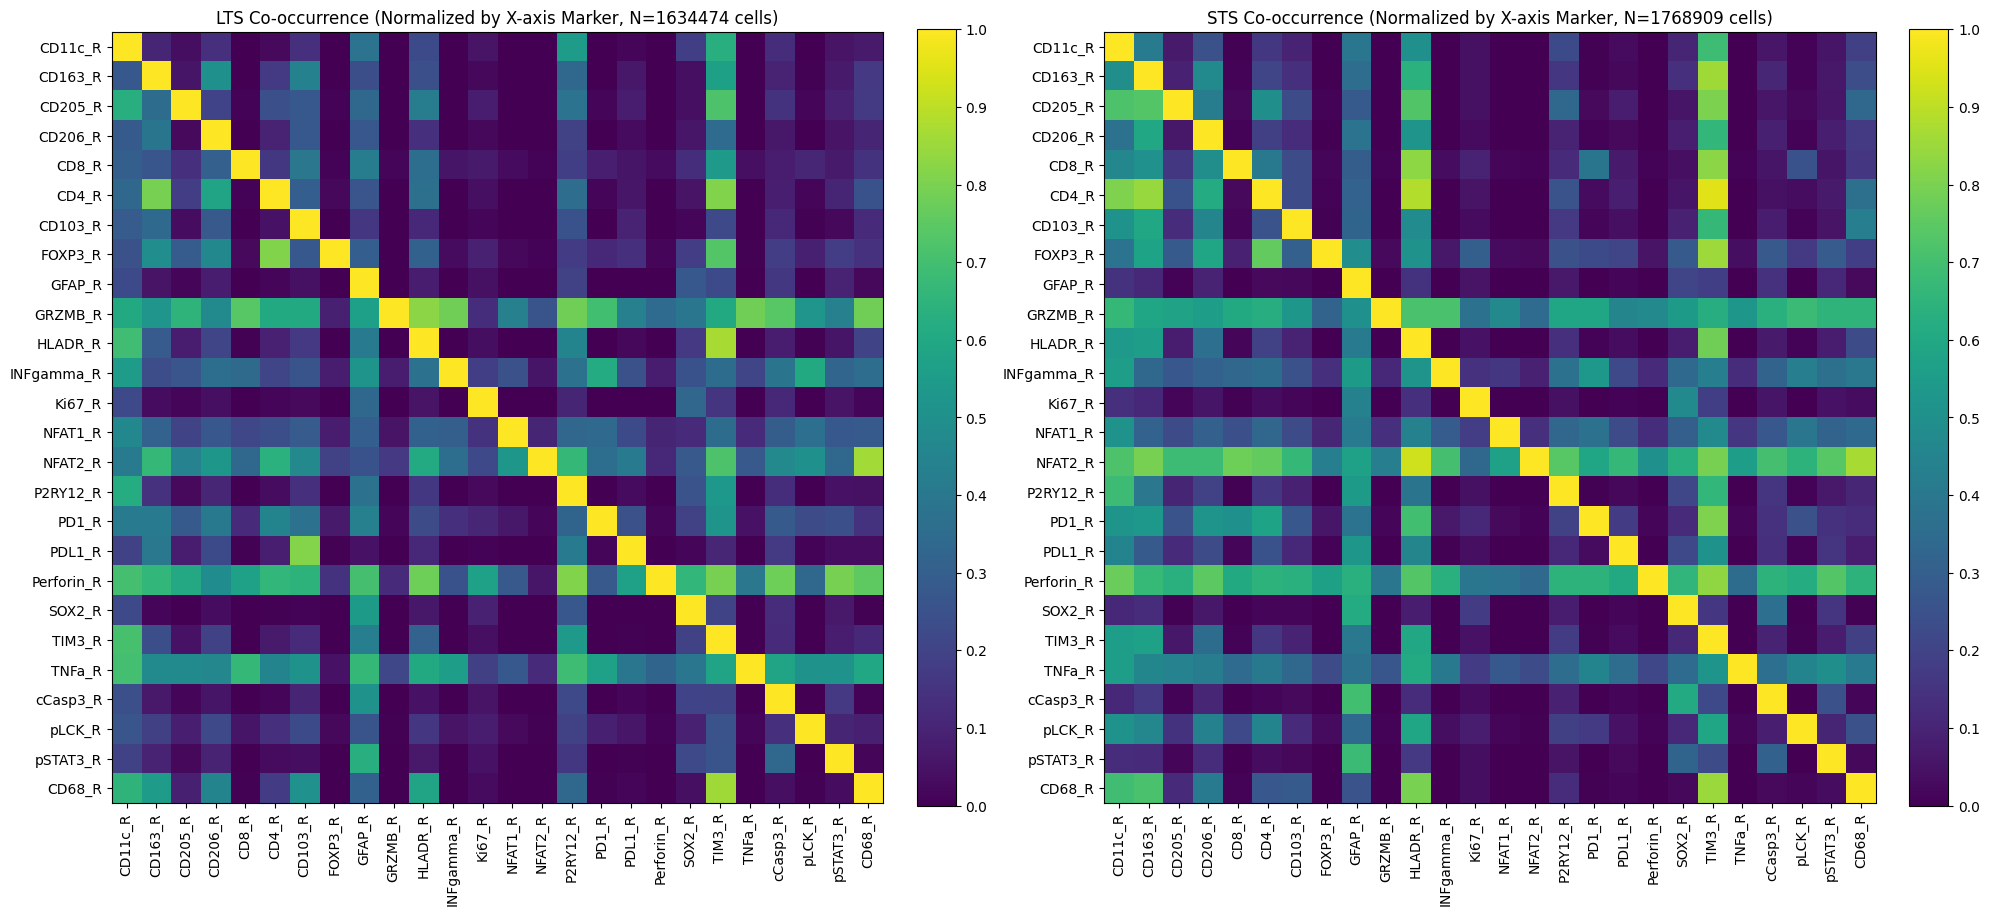

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_csv(file_path):
    with open(file_path, 'r') as f:
        headers = f.readline().strip().split(',')
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, filling_values=0.0)
    return headers, data

def threshold_data(data, headers, thresholds, markers):
    marker_indices = [headers.index(marker) for marker in markers]
    marker_data = data[:, marker_indices]
    
    thresholds_array = np.array([thresholds[marker] for marker in markers])
    thresholded = (marker_data >= thresholds_array).astype(int)
    
    return thresholded

def aggregate_co_occurrence(filelist, thresholddict, markers):
    total_cells = 0
    co_occ_mat = np.zeros((len(markers), len(markers)), dtype=float)
    
    for file in filelist:
        headers, data = load_csv(file)
        thresholds = thresholddict[file]
        
        thresholded_data = threshold_data(data, headers, thresholds, markers)
        n_cells = thresholded_data.shape[0]
        total_cells += n_cells
        
        co_occ_mat_file = thresholded_data.T @ thresholded_data
        co_occ_mat += co_occ_mat_file
    
    diag = np.diag(co_occ_mat)
    with np.errstate(divide='ignore', invalid='ignore'):
        normalized_mat = np.divide(co_occ_mat, diag[:, None])
        normalized_mat[~np.isfinite(normalized_mat)] = 0
    
    return normalized_mat, total_cells

any_file = list(thresholddict.keys())[0]
markers = list(thresholddict[any_file].keys())


LTS_files = [
    "LTSvsSTS-Data/NU01713.csv", "LTSvsSTS-Data/NU02064.csv", "LTSvsSTS-Data/NU00866.csv", 
    "LTSvsSTS-Data/NU01482.csv", "LTSvsSTS-Data/NU01405.csv", "LTSvsSTS-Data/NU00908.csv", 
    "LTSvsSTS-Data/NU00295.csv", "LTSvsSTS-Data/NU01115.csv", "LTSvsSTS-Data/NU01094.csv", 
    "LTSvsSTS-Data/NU01798.csv"
]

STS_files = [
    "LTSvsSTS-Data/NU00429.csv", "LTSvsSTS-Data/NU00468.csv", "LTSvsSTS-Data/NU02738.csv", 
    "LTSvsSTS-Data/NU02514.csv", "LTSvsSTS-Data/NU00431.csv", "LTSvsSTS-Data/NU00759.csv", 
    "LTSvsSTS-Data/NU01420.csv", "LTSvsSTS-Data/NU02359.csv", "LTSvsSTS-Data/NU00826.csv", 
    "LTSvsSTS-Data/NU01929.csv"
]

# Compute co-occurrence matrices for LTS and STS
lts_mat, lts_cells = aggregate_co_occurrence(LTS_files, thresholddict, markers)
sts_mat, sts_cells = aggregate_co_occurrence(STS_files, thresholddict, markers)

# Plotting heatmaps side by side
fig, axes = plt.subplots(ncols=2, figsize=(20,10))

# Set colorbar increments
cbar_ticks = np.arange(0, 1.1, 0.1)  # from 0 to 1, step 0.1

# Plot LTS heatmap
im1 = axes[0].imshow(lts_mat, cmap='viridis', aspect='equal', vmin=0, vmax=1)
axes[0].set_title(f'LTS Co-occurrence (Normalized by X-axis Marker, N={lts_cells} cells)')
axes[0].set_xticks(range(len(markers)))
axes[0].set_yticks(range(len(markers)))
axes[0].set_xticklabels(markers, rotation=90)
axes[0].set_yticklabels(markers)
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, ticks=cbar_ticks)
cbar1.ax.set_yticklabels([f'{t:.1f}' for t in cbar_ticks])

# Plot STS heatmap
im2 = axes[1].imshow(sts_mat, cmap='viridis', aspect='equal', vmin=0, vmax=1)
axes[1].set_title(f'STS Co-occurrence (Normalized by X-axis Marker, N={sts_cells} cells)')
axes[1].set_xticks(range(len(markers)))
axes[1].set_yticks(range(len(markers)))
axes[1].set_xticklabels(markers, rotation=90)
axes[1].set_yticklabels(markers)
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, ticks=cbar_ticks)
cbar2.ax.set_yticklabels([f'{t:.1f}' for t in cbar_ticks])

plt.tight_layout()

# Save the figure as a JPEG with high resolution
plt.savefig('cooccurrence_heatmaps.jpg', dpi=300)

plt.show()